In [1]:
import numpy as np
import tensorflow as tf

In [2]:
x=tf.constant([1.0,2.0,3.0,4.0])
y=tf.constant([5.0,6.0,7.0,8.0])
with tf.name_scope ("scope_arrayx"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output = sess.run(x[i])
            print(output)
    

with tf.name_scope ("scope_arrayy"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output1 = sess.run(y[i])
            print(output1)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0


In [3]:
with tf.name_scope("scope_mean"):
    x1=tf.reduce_mean(x)
    y1=tf.reduce_mean(y)

In [4]:
with tf.name_scope("scope_variance"):
    v1=tf.subtract(x,x1)
    v2=tf.multiply(v1,v1)
    v3=tf.reduce_sum(v2)

In [5]:
with tf.name_scope("scope_covariance"):
    c1=tf.subtract(y,y1)
    c2=tf.multiply(v1,c1)
    c3=tf.reduce_sum(c2)

In [6]:
with tf.name_scope("scope_value_c"):
    c=tf.divide(c3,v3)

In [7]:
with tf.name_scope("scope_value_m"):
    m1=tf.multiply(c,x1)
    m2=tf.subtract(y1,m1)

In [8]:
sess=tf.Session()
print(sess.run(x))
print(sess.run(y))
print(sess.run(x1))
print(sess.run(y1))
print(sess.run(v3))
print(sess.run(c3))
print(sess.run(c))
print(sess.run(m2))

[ 1.  2.  3.  4.]
[ 5.  6.  7.  8.]
2.5
6.5
5.0
5.0
1.0
4.0


In [9]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/linear_eq", sess.graph)
    writer.close()

In [10]:
with tf.Session() as sess:
    d1=sess.run(x)
    e1=sess.run(y)
arr_x = np.asarray(d1)
arr_y = np.asarray(e1)
val_x=tf.constant([1.0, 3.0, 5.0, 7.0, 9.0])
with tf.Session() as sess:
    val_x1=sess.run(val_x)
val_x2=np.asarray(val_x1)
val_y=[0]*5
with tf.Session() as sess:
        for i in range(len(sess.run(val_x))):
            p1 = sess.run(val_x[i])
            p2=tf.multiply(p1,m2)
            p3=tf.add(p2,c)
            val_y[i]=sess.run(p3)
print(val_y)

[5.0, 13.0, 21.0, 29.0, 37.0]


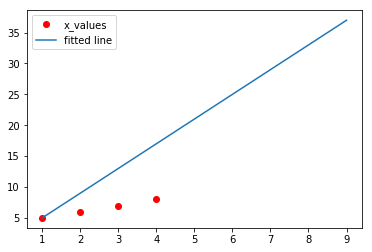

In [11]:
import matplotlib.pyplot as plt
plt.plot(arr_x, arr_y, 'ro', label='x_values')
plt.plot(val_x2, val_y, label='fitted line')
plt.legend()
plt.show()

In [12]:
with tf.name_scope("scope_rms"):
    rms=tf.sqrt(tf.reduce_mean(tf.squared_difference(arr_x,arr_y)))
    with tf.Session() as sess:
        print(sess.run(rms))

4.0
